In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import statsmodels.api as sm

price = pd.read_table('pricelist.csv',delimiter =';')
combi = pd.read_table('Historical_combi2.csv',delimiter =';')
I_2011 = pd.read_table('Mars_2014.csv',delimiter =';')



In [83]:
I_2011

,Pred Year,Pred brent 2014,Pred FO 1% 2014,Pred FO 3.5% 2014,Pred Jet 2014,TD 2014,Actual 2014,MD 2014
0,2008,75.0,-13.96,-21.85,22.90,-4.30,-6,-4.98
1,2009,71.0,-13.27,-18.76,18.56,-4.29,-6,-4.24
2,2010,82.5,-8.44,-14.03,18.61,-2.76,-6,-3.38
3,2011,100.0,1.37,-4.22,28.11,-1.81,-6,-2.25
4,2012,100.0,-6.84,-11.13,17.09,-0.65,-6,-4.38
5,2013,100.0,-7.03,-12.15,17.34,-1.82,-6,-3.84


In [84]:
import datetime
datetimes = [datetime.datetime.strptime(d, '%d.%m.%Y') for d in combi["Date"]]


df = pd.DataFrame(datetimes, columns=['date'])
df.loc[:, 'date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

combi = combi.assign(df=df['date'].values)
#print(combi)


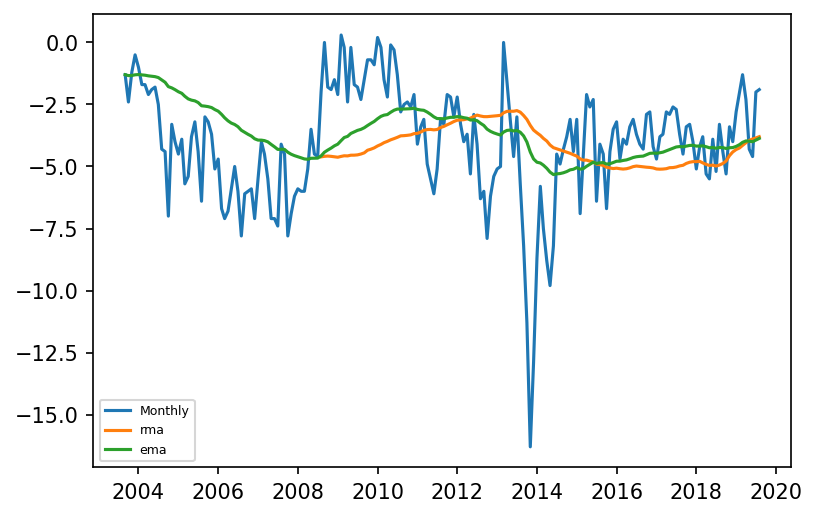

In [85]:
plt.rcParams['figure.dpi'] = 150

rma60 = combi["Mars"].rolling(window=60).mean()
ema60 = combi["Mars"].ewm(span=60, adjust=False).mean()
plt.plot(combi["df"],combi["Mars"])
plt.plot(combi["df"],rma60)
plt.plot(combi["df"],ema60)
plt.legend(("Monthly","rma","ema"))
plt.show()

combi = combi.assign(ema60=ema60.values)
combi = combi.assign(rma60=rma60.values)

In [73]:
take=2013

In [54]:
if take==2011: 
    ema=[combi[combi['df']=='2005-01-01']['ema60'].values,combi[combi['df']=='2006-01-01']['ema60'].values   \
     ,combi[combi['df']=='2007-01-01']['ema60'].values,combi[combi['df']=='2008-01-01']['ema60'].values  \
     ,combi[combi['df']=='2009-01-01']['ema60'].values,combi[combi['df']=='2010-01-01']['ema60'].values]
    
elif take==2012:
        ema=[combi[combi['df']=='2006-01-01']['ema60'].values,combi[combi['df']=='2007-01-01']['ema60'].values   \
     ,combi[combi['df']=='2008-01-01']['ema60'].values,combi[combi['df']=='2009-01-01']['ema60'].values  \
     ,combi[combi['df']=='2010-01-01']['ema60'].values,combi[combi['df']=='2011-01-01']['ema60'].values]
    
elif take==2013:
    ema=[combi[combi['df']=='2007-01-01']['ema60'].values,combi[combi['df']=='2008-01-01']['ema60'].values   \
     ,combi[combi['df']=='2009-01-01']['ema60'].values,combi[combi['df']=='2010-01-01']['ema60'].values  \
     ,combi[combi['df']=='2011-01-01']['ema60'].values,combi[combi['df']=='2012-01-01']['ema60'].values]
    
else:
    ema=[combi[combi['df']=='2008-01-01']['ema60'].values,combi[combi['df']=='2009-01-01']['ema60'].values   \
     ,combi[combi['df']=='2010-01-01']['ema60'].values,combi[combi['df']=='2011-01-01']['ema60'].values  \
     ,combi[combi['df']=='2012-01-01']['ema60'].values,combi[combi['df']=='2013-01-01']['ema60'].values]
    
ema

[array([-3.93624331]),
 array([-4.6059071]),
 array([-4.10027907]),
 array([-3.07314199]),
 array([-2.69973742]),
 array([-2.98987322])]

In [55]:
if take==2011: 
    rma=[combi[combi['df']=='2005-01-01']['rma60'].values,combi[combi['df']=='2006-01-01']['rma60'].values   \
     ,combi[combi['df']=='2007-01-01']['rma60'].values,combi[combi['df']=='2008-01-01']['rma60'].values  \
     ,combi[combi['df']=='2009-01-01']['rma60'].values,combi[combi['df']=='2010-01-01']['rma60'].values]
    
elif take==2012:
        rma=[combi[combi['df']=='2006-01-01']['rma60'].values,combi[combi['df']=='2007-01-01']['rma60'].values   \
     ,combi[combi['df']=='2008-01-01']['rma60'].values,combi[combi['df']=='2009-01-01']['rma60'].values  \
     ,combi[combi['df']=='2010-01-01']['rma60'].values,combi[combi['df']=='2011-01-01']['rma60'].values]
    
elif take==2013:
    rma=[combi[combi['df']=='2007-01-01']['rma60'].values,combi[combi['df']=='2008-01-01']['rma60'].values   \
     ,combi[combi['df']=='2009-01-01']['rma60'].values,combi[combi['df']=='2010-01-01']['rma60'].values  \
     ,combi[combi['df']=='2011-01-01']['rma60'].values,combi[combi['df']=='2012-01-01']['rma60'].values]
    
else:
    rma=[combi[combi['df']=='2008-01-01']['rma60'].values,combi[combi['df']=='2009-01-01']['rma60'].values   \
     ,combi[combi['df']=='2010-01-01']['rma60'].values,combi[combi['df']=='2011-01-01']['rma60'].values  \
     ,combi[combi['df']=='2012-01-01']['rma60'].values,combi[combi['df']=='2013-01-01']['rma60'].values]

rma

[array([nan]),
 array([nan]),
 array([-4.62666667]),
 array([-4.17166667]),
 array([-3.665]),
 array([-3.13333333])]

In [86]:
combi=combi.fillna(0)

X = combi[['Jet','FO 3.5%']]
Y = combi['Mars']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)


FO35= I_2011["Pred FO 3.5% 2014"]
Jet= I_2011["Pred Jet 2014"]

linear_Mars=regr.intercept_+ regr.coef_[0]*Jet + regr.coef_[1]*FO35
print(linear_Mars)

Intercept: 
 0.24872260401274193
Coefficients: 
 [-0.015893    0.25853894]
                            OLS Regression Results                            
Dep. Variable:                   Mars   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     87.77
Date:                Tue, 05 Nov 2019   Prob (F-statistic):           3.87e-29
Time:                        15:41:19   Log-Likelihood:                -497.07
No. Observations:                 236   AIC:                             1000.
Df Residuals:                     233   BIC:                             1011.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [87]:

nonlinear_Mars = 0.00533572984584189*Jet + 0.00232258205864726*Jet**2 - 5.0468498330526 
- 0.379625720730507*(FO35) - 0.000535344925798245*(FO35)**3 - 0.0324550409045776*(FO35)**2

0   -1.615397
1   -0.765836
2    0.416120
3    1.064280
4    0.942911
5    0.781560
Name: Pred FO 3.5% 2014, dtype: float64

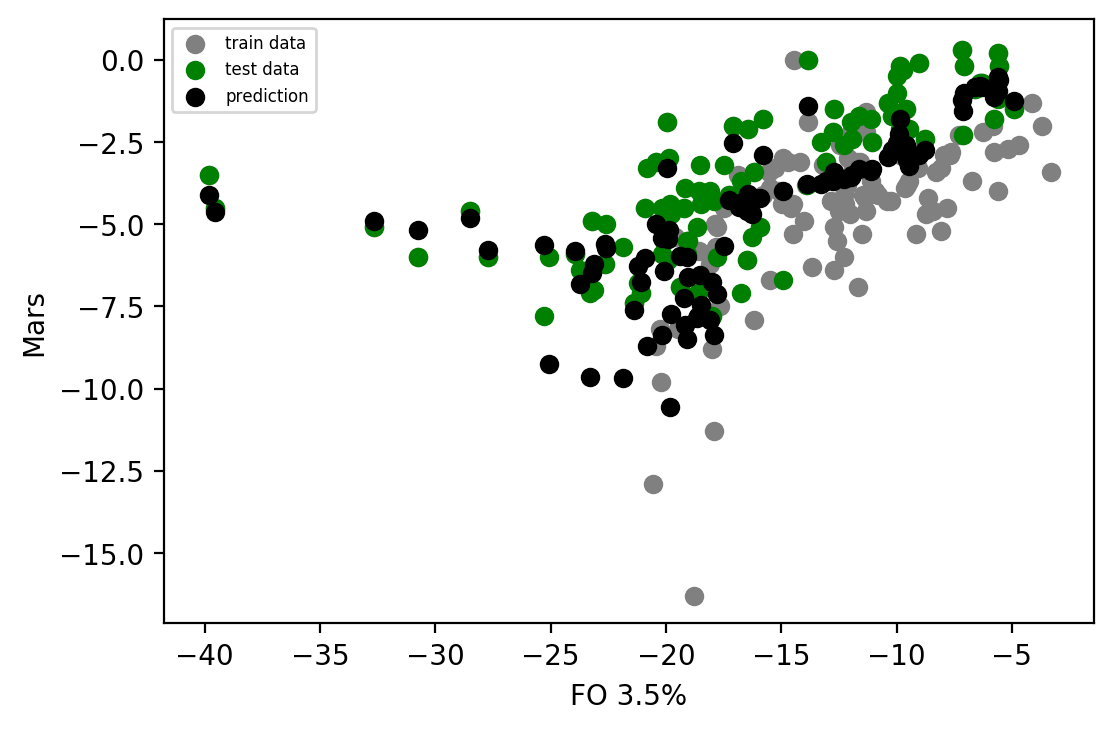

Mean squared error: 1.39
Feature ranking:
Feature Jet (0.319903)
Feature FO 3.5% (0.680097)


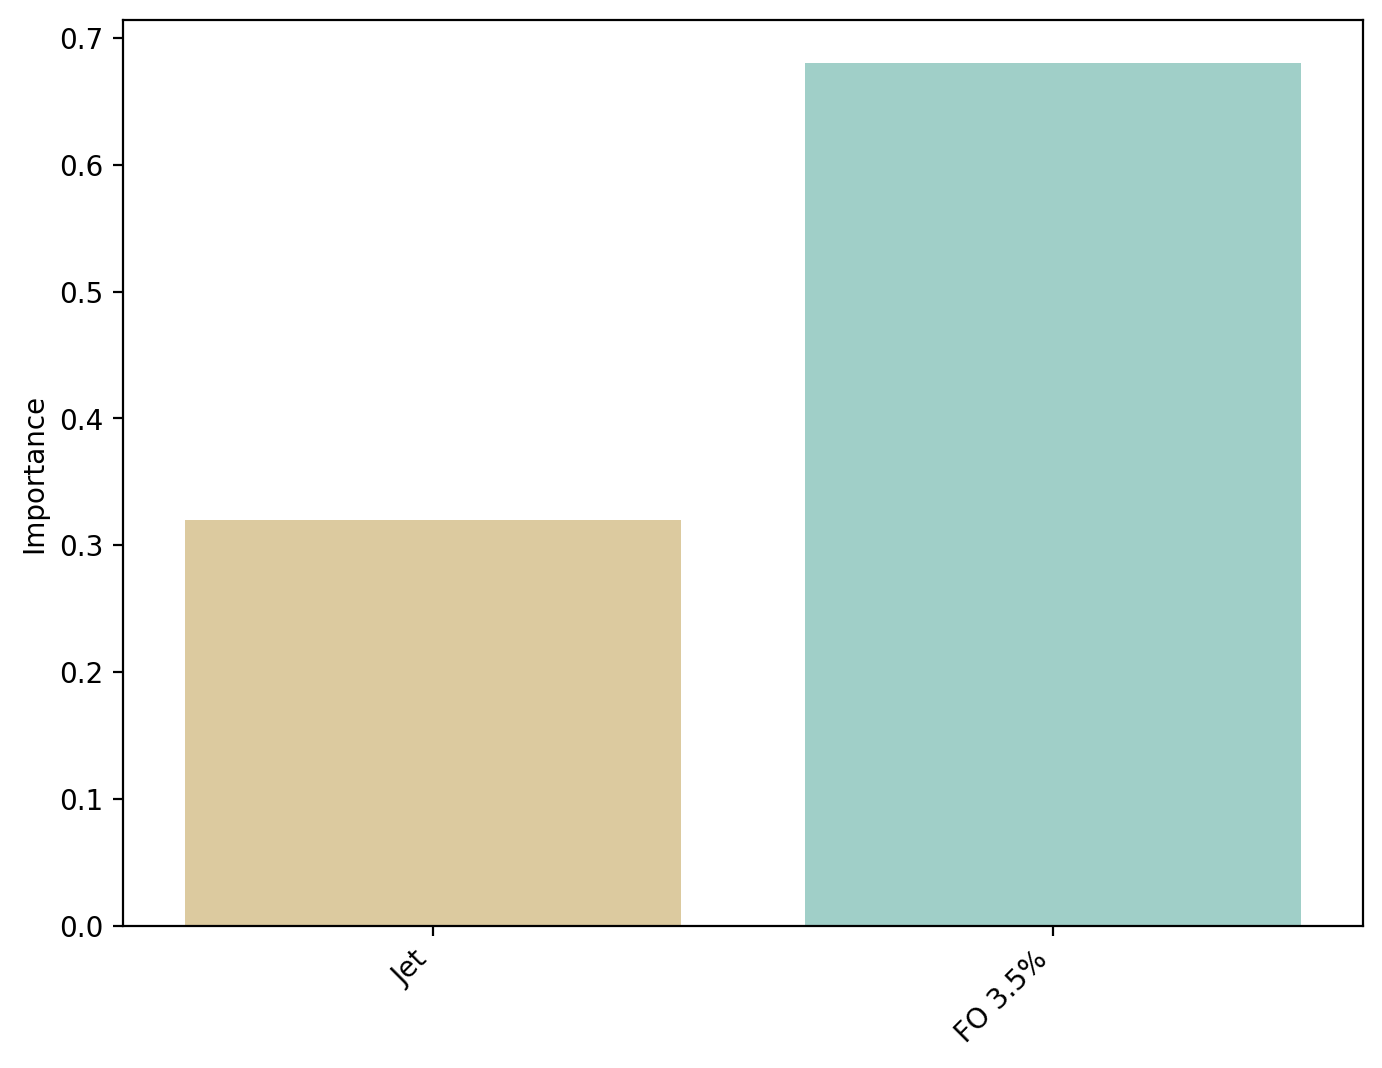

In [91]:
train_combi = combi.iloc[-150:,1:]
test_combi = combi.iloc[46:140,1:]
#train_combi = combi.iloc[46:,1:]
#test_combi = combi.iloc[-100:,1:]

plt.rcParams['figure.dpi'] = 200

#x_train=train_combi.drop("Maya Europe",axis=1)
#x_train=train_combi[train_combi.columns.difference(["Mars"])]
x_train=train_combi[["Jet","FO 3.5%"]]
y_train=train_combi["Mars"]

#df.drop('b', axis=1)

#x_test=train_combi.drop("Maya Europe",axis=1)
#x_test=test_combi[test_combi.columns.difference(["Mars"])]
x_test=test_combi[["Jet","FO 3.5%"]]
y_test=test_combi["Mars"].to_frame()



regressor = RandomForestRegressor(n_estimators=200, max_depth=5)

clf=regressor.fit(x_train, y_train)

y_pred=regressor.predict(x_test)
y_pred=pd.DataFrame(y_pred)


plt_train=plt.scatter(x_train["FO 3.5%"],y_train,   color='grey')
plt_test=plt.scatter(x_test["FO 3.5%"],y_test,   color='green')
plt_pred=plt.scatter(x_test["FO 3.5%"], y_pred,  color='black')



plt.xlabel("FO 3.5%")
plt.ylabel("Mars")
plt.legend((plt_train, plt_test,plt_pred),("train data", "test data","prediction"))
plt.show()

print("Mean squared error: %.2f"
      % np.mean((regressor.predict(x_train) - y_train) ** 2))

import seaborn as sns
importances=regressor.feature_importances_

indices=list(x_train)
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("Feature %s (%f)" % (indices[f], importances[f]))

f, (ax1) = plt.subplots(1, 1, figsize=(8, 6), sharex=True)
sns.barplot(indices, importances, palette="BrBG", ax=ax1)
ax1.set_ylabel("Importance")

ax1.set_xticklabels(
    ax1.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);




In [92]:
#data_df = price[['Dated brent','FO 3.5%','FO 1%']]

data_df = pd.concat([Jet,FO35],axis=1)
y_pred=regressor.predict(data_df)
y_pred= pd.DataFrame(y_pred)
print(y_pred)

          0
0 -5.694622
1 -7.688057
2 -3.805141
3 -2.755170
4 -3.506967
5 -3.807749


MSE linear = 1.37
MSE non.linear = 0.61
MSE RF = 1.07


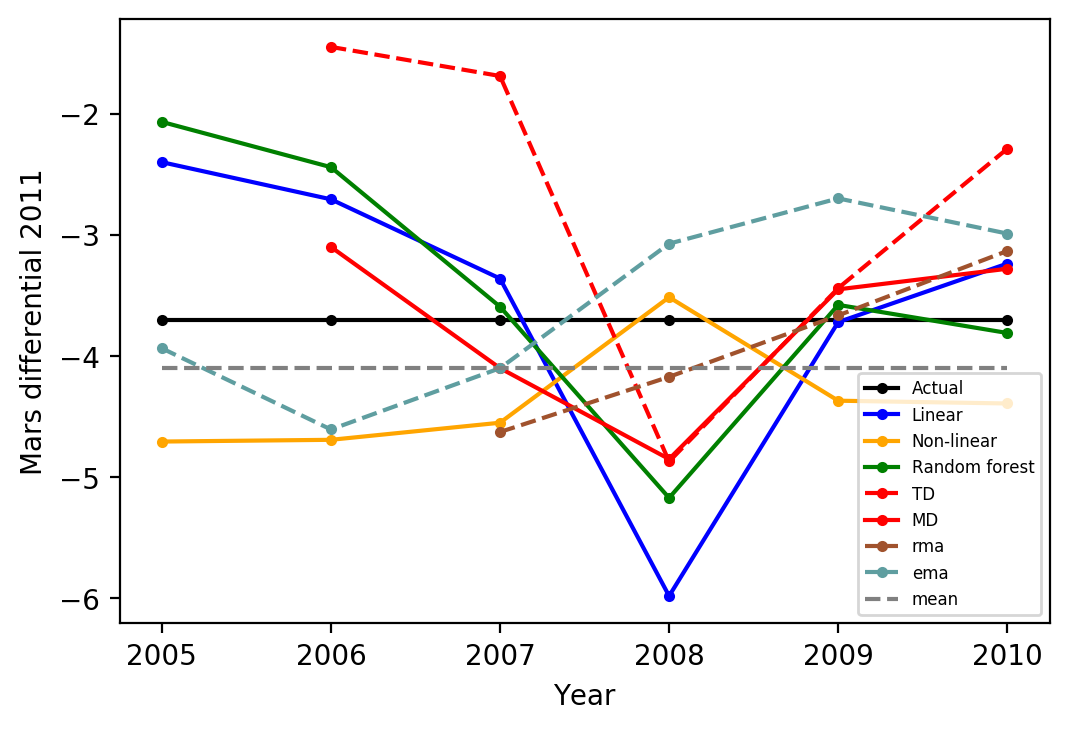

In [48]:
import pylab as plot
params = {'legend.fontsize': 6,
          'legend.handlelength': 2}
plot.rcParams.update(params)
plt.plot(I_2011["Pred Year"],I_2011["Actual 2011"],'k.-')
plt.plot(I_2011["Pred Year"],linear_Mars,'b.-')
plt.plot(I_2011["Pred Year"],nonlinear_Mars,'.-',color ='orange')
plt.plot(I_2011["Pred Year"],y_pred,'g.-')
plt.plot(I_2011["Pred Year"],I_2011["TD 2011"],'r.--')
plt.plot(I_2011["Pred Year"],I_2011["MD 2011"],'r.-')
plt.plot(I_2011["Pred Year"],rma,'.--',color ='sienna')
plt.plot(I_2011["Pred Year"],ema,'.--',color ='cadetblue')
plt.plot([I_2011["Pred Year"].iloc[0],I_2011["Pred Year"].iloc[-1]],[-4.1,-4.1],'--',color='grey')
plt.xlabel('Year')
plt.ylabel('Mars differential 2011')
plt.legend(("Actual","Linear","Non-linear","Random forest","TD","MD","rma","ema","mean"))

from sklearn.metrics import mean_squared_error 
mse_L = mean_squared_error(I_2011["Actual 2011"],linear_Mars)
mse_NL = mean_squared_error(I_2011["Actual 2011"],nonlinear_Mars)
mse_RF = mean_squared_error(I_2011["Actual 2011"],y_pred)


print('MSE linear =',"{0:.2f}".format(mse_L))
print('MSE non.linear =',"{0:.2f}".format(mse_NL))
print('MSE RF =',"{0:.2f}".format(mse_RF))



MSE linear = 2.98
MSE non.linear = 0.63
MSE RF = 1.70
MSE MD = 2.67


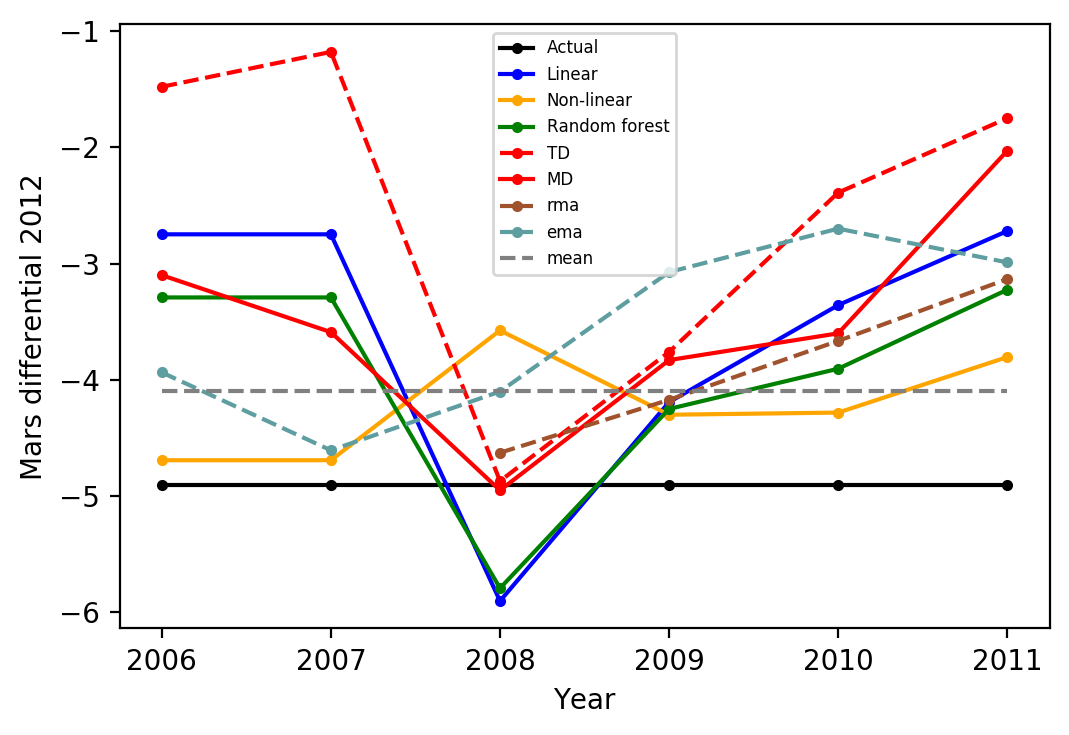

In [68]:
import pylab as plot
params = {'legend.fontsize': 6,
          'legend.handlelength': 2}
plot.rcParams.update(params)
plt.plot(I_2011["Pred Year"],I_2011["Actual 2012"],'k.-')
plt.plot(I_2011["Pred Year"],linear_Mars,'b.-')
plt.plot(I_2011["Pred Year"],nonlinear_Mars,'.-',color ='orange')
plt.plot(I_2011["Pred Year"],y_pred,'g.-')
plt.plot(I_2011["Pred Year"],I_2011["TD 2012"],'r.--')
plt.plot(I_2011["Pred Year"],I_2011["MD 2012"],'r.-')
plt.plot(I_2011["Pred Year"],rma,'.--',color ='sienna')
plt.plot(I_2011["Pred Year"],ema,'.--',color ='cadetblue')
plt.plot([I_2011["Pred Year"].iloc[0],I_2011["Pred Year"].iloc[-1]],[-4.1,-4.1],'--',color='grey')
plt.xlabel('Year')
plt.ylabel('Mars differential 2012')
plt.legend(("Actual","Linear","Non-linear","Random forest","TD","MD","rma","ema","mean"))


from sklearn.metrics import mean_squared_error 
mse_L = mean_squared_error(I_2011["Actual 2012"],linear_Mars)
mse_NL = mean_squared_error(I_2011["Actual 2012"],nonlinear_Mars)
mse_RF = mean_squared_error(I_2011["Actual 2012"],y_pred)
mse_MD = mean_squared_error(I_2011["Actual 2012"],I_2011["MD 2012"])

print('MSE linear =',"{0:.2f}".format(mse_L))
print('MSE non.linear =',"{0:.2f}".format(mse_NL))
print('MSE RF =',"{0:.2f}".format(mse_RF))
print('MSE MD =',"{0:.2f}".format(mse_MD))


MSE linear = 8.63
MSE non.linear = 5.24
MSE RF = 7.22
MSE MD = 7.95


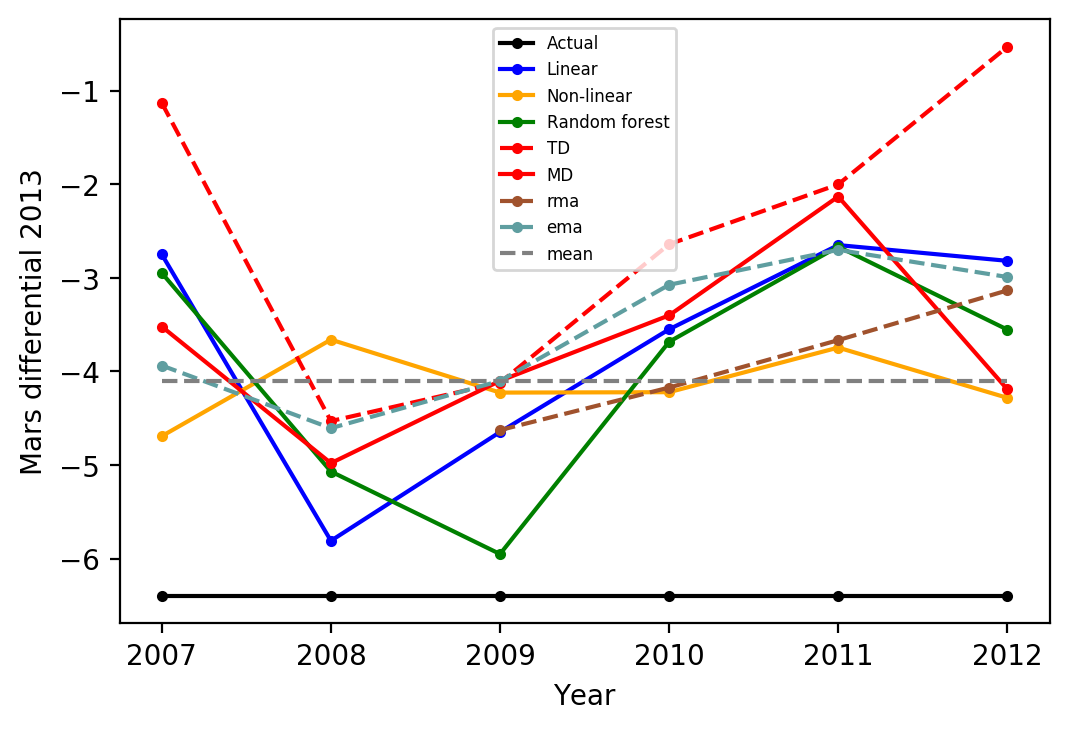

In [81]:
import pylab as plot
params = {'legend.fontsize': 6,
          'legend.handlelength': 2}
plot.rcParams.update(params)
plt.plot(I_2011["Pred Year"],I_2011["Actual 2013"],'k.-')
plt.plot(I_2011["Pred Year"],linear_Mars,'b.-')
plt.plot(I_2011["Pred Year"],nonlinear_Mars,'.-',color ='orange')
plt.plot(I_2011["Pred Year"],y_pred,'g.-')
plt.plot(I_2011["Pred Year"],I_2011["TD 2013"],'r.--')
plt.plot(I_2011["Pred Year"],I_2011["MD 2013"],'r.-')
plt.plot(I_2011["Pred Year"],rma,'.--',color ='sienna')
plt.plot(I_2011["Pred Year"],ema,'.--',color ='cadetblue')
plt.plot([I_2011["Pred Year"].iloc[0],I_2011["Pred Year"].iloc[-1]],[-4.1,-4.1],'--',color='grey')
plt.xlabel('Year')
plt.ylabel('Mars differential 2013')
plt.legend(("Actual","Linear","Non-linear","Random forest","TD","MD","rma","ema","mean"))

from sklearn.metrics import mean_squared_error 
mse_L = mean_squared_error(I_2011["Actual 2013"],linear_Mars)
mse_NL = mean_squared_error(I_2011["Actual 2013"],nonlinear_Mars)
mse_RF = mean_squared_error(I_2011["Actual 2013"],y_pred)
mse_MD = mean_squared_error(I_2011["Actual 2013"],I_2011["MD 2013"])

print('MSE linear =',"{0:.2f}".format(mse_L))
print('MSE non.linear =',"{0:.2f}".format(mse_NL))
print('MSE RF =',"{0:.2f}".format(mse_RF))
print('MSE MD =',"{0:.2f}".format(mse_MD))

MSE linear = 7.75
MSE non.linear = 4.46
MSE RF = 4.89
MSE MD = 5.39


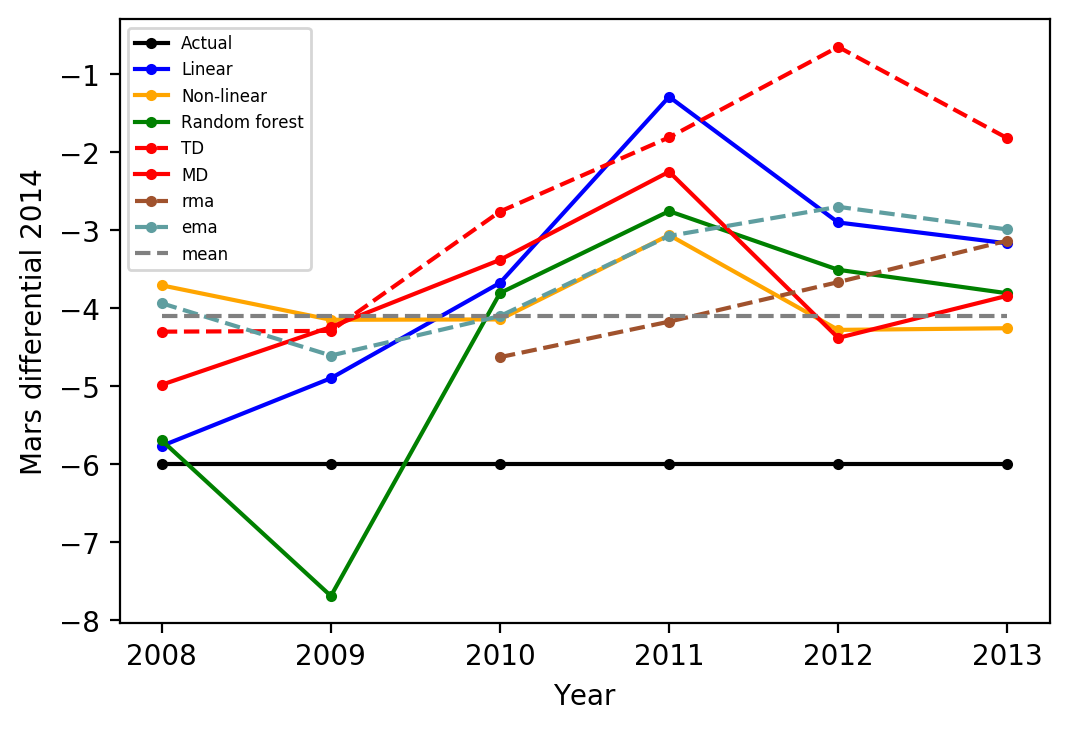

In [94]:
import pylab as plot
params = {'legend.fontsize': 6,
          'legend.handlelength': 2}
plot.rcParams.update(params)
plt.plot(I_2011["Pred Year"],I_2011["Actual 2014"],'k.-')
plt.plot(I_2011["Pred Year"],linear_Mars,'b.-')
plt.plot(I_2011["Pred Year"],nonlinear_Mars,'.-',color ='orange')
plt.plot(I_2011["Pred Year"],y_pred,'g.-')
plt.plot(I_2011["Pred Year"],I_2011["TD 2014"],'r.--')
plt.plot(I_2011["Pred Year"],I_2011["MD 2014"],'r.-')
plt.plot(I_2011["Pred Year"],rma,'.--',color ='sienna')
plt.plot(I_2011["Pred Year"],ema,'.--',color ='cadetblue')
plt.plot([I_2011["Pred Year"].iloc[0],I_2011["Pred Year"].iloc[-1]],[-4.1,-4.1],'--',color='grey')
plt.xlabel('Year')
plt.ylabel('Mars differential 2014')
plt.legend(("Actual","Linear","Non-linear","Random forest","TD","MD","rma","ema","mean"))

from sklearn.metrics import mean_squared_error 
mse_L = mean_squared_error(I_2011["Actual 2014"],linear_Mars)
mse_NL = mean_squared_error(I_2011["Actual 2014"],nonlinear_Mars)
mse_RF = mean_squared_error(I_2011["Actual 2014"],y_pred)
mse_MD = mean_squared_error(I_2011["Actual 2014"],I_2011["MD 2014"])

print('MSE linear =',"{0:.2f}".format(mse_L))
print('MSE non.linear =',"{0:.2f}".format(mse_NL))
print('MSE RF =',"{0:.2f}".format(mse_RF))
print('MSE MD =',"{0:.2f}".format(mse_MD))